<a href="https://colab.research.google.com/github/DataCrusade1999/silver-umbrella/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import os
import random
import glob
import shutil
import itertools
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras
from random import randint
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

**DATA**

In [2]:
train_labels=[]
train_samples=[]
for i in range(50):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)
  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)
for i in range(1000):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)
  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)
  

In [3]:
test_labels=[]
test_samples=[]
for i in range(50):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)
  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)
for i in range(200):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)
  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [4]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_sample=scaler.fit_transform(train_samples.reshape(-1,1))

In [5]:
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)
test_labels,test_samples=shuffle(test_labels,test_samples)
scaled_test_sample=scaler.fit_transform(test_samples.reshape(-1,1))

**MODEL TRAINING**

In [6]:
model=Sequential([Dense(units=16,input_shape=(1,),activation='relu'),Dense(units=32,activation='relu'),Dense(units=2,activation='softmax')])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(x=scaled_train_sample,y=train_labels,validation_split=0.1,batch_size=10,epochs=25,shuffle=True,verbose=2)

Epoch 1/25
189/189 - 0s - loss: 0.6588 - accuracy: 0.5280 - val_loss: 0.6496 - val_accuracy: 0.5619
Epoch 2/25
189/189 - 0s - loss: 0.6313 - accuracy: 0.6196 - val_loss: 0.6195 - val_accuracy: 0.6381
Epoch 3/25
189/189 - 0s - loss: 0.6006 - accuracy: 0.6783 - val_loss: 0.5892 - val_accuracy: 0.7143
Epoch 4/25
189/189 - 0s - loss: 0.5712 - accuracy: 0.7217 - val_loss: 0.5602 - val_accuracy: 0.7524
Epoch 5/25
189/189 - 0s - loss: 0.5424 - accuracy: 0.7540 - val_loss: 0.5296 - val_accuracy: 0.7952
Epoch 6/25
189/189 - 0s - loss: 0.5128 - accuracy: 0.7878 - val_loss: 0.4993 - val_accuracy: 0.8190
Epoch 7/25
189/189 - 0s - loss: 0.4836 - accuracy: 0.8164 - val_loss: 0.4693 - val_accuracy: 0.8571
Epoch 8/25
189/189 - 0s - loss: 0.4552 - accuracy: 0.8481 - val_loss: 0.4403 - val_accuracy: 0.8571
Epoch 9/25
189/189 - 0s - loss: 0.4287 - accuracy: 0.8630 - val_loss: 0.4139 - val_accuracy: 0.8714
Epoch 10/25
189/189 - 0s - loss: 0.4045 - accuracy: 0.8735 - val_loss: 0.3886 - val_accuracy: 0.8857

**PREDICTIONS**

In [10]:
predictions=model.predict(x=scaled_test_sample,batch_size=10,verbose=0)

In [11]:
rounded_predictions=np.argmax(predictions,axis=-1) #Easy To Interpret We Can loop(for) Through It

**CONFUSION MATRIX**

In [12]:
cm=confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [13]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[197  53]
 [ 50 200]]


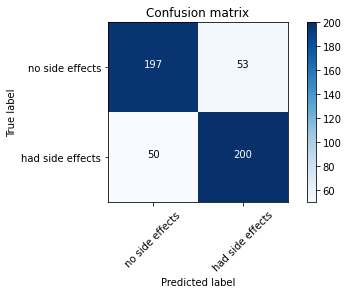

In [14]:
cm_plot_label=['no side effects','had side effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_label)

**SAVING THE MODEL**

In [15]:
#import os.path
#model.save('saved_model/my_model.h5')

In [16]:
#from tensorflow.keras.models import load_model
#N_model=load_model('saved_model/my_model.h5')

In [17]:
#N_model.summary()

In [18]:
#N_model.get_weights()

In [19]:
#N_model.optimizer

  **MobileNet**

In [20]:
mobile=tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [21]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [27]:
def prepare_image(file):
    img_path='/content/'
    img=image.load_img(img_path+file,target_size=(224,224))
    img_array=image.img_to_array(img)
    image_array_expanded_dim=np.expand_dims(img_array,axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(image_array_expanded_dim)

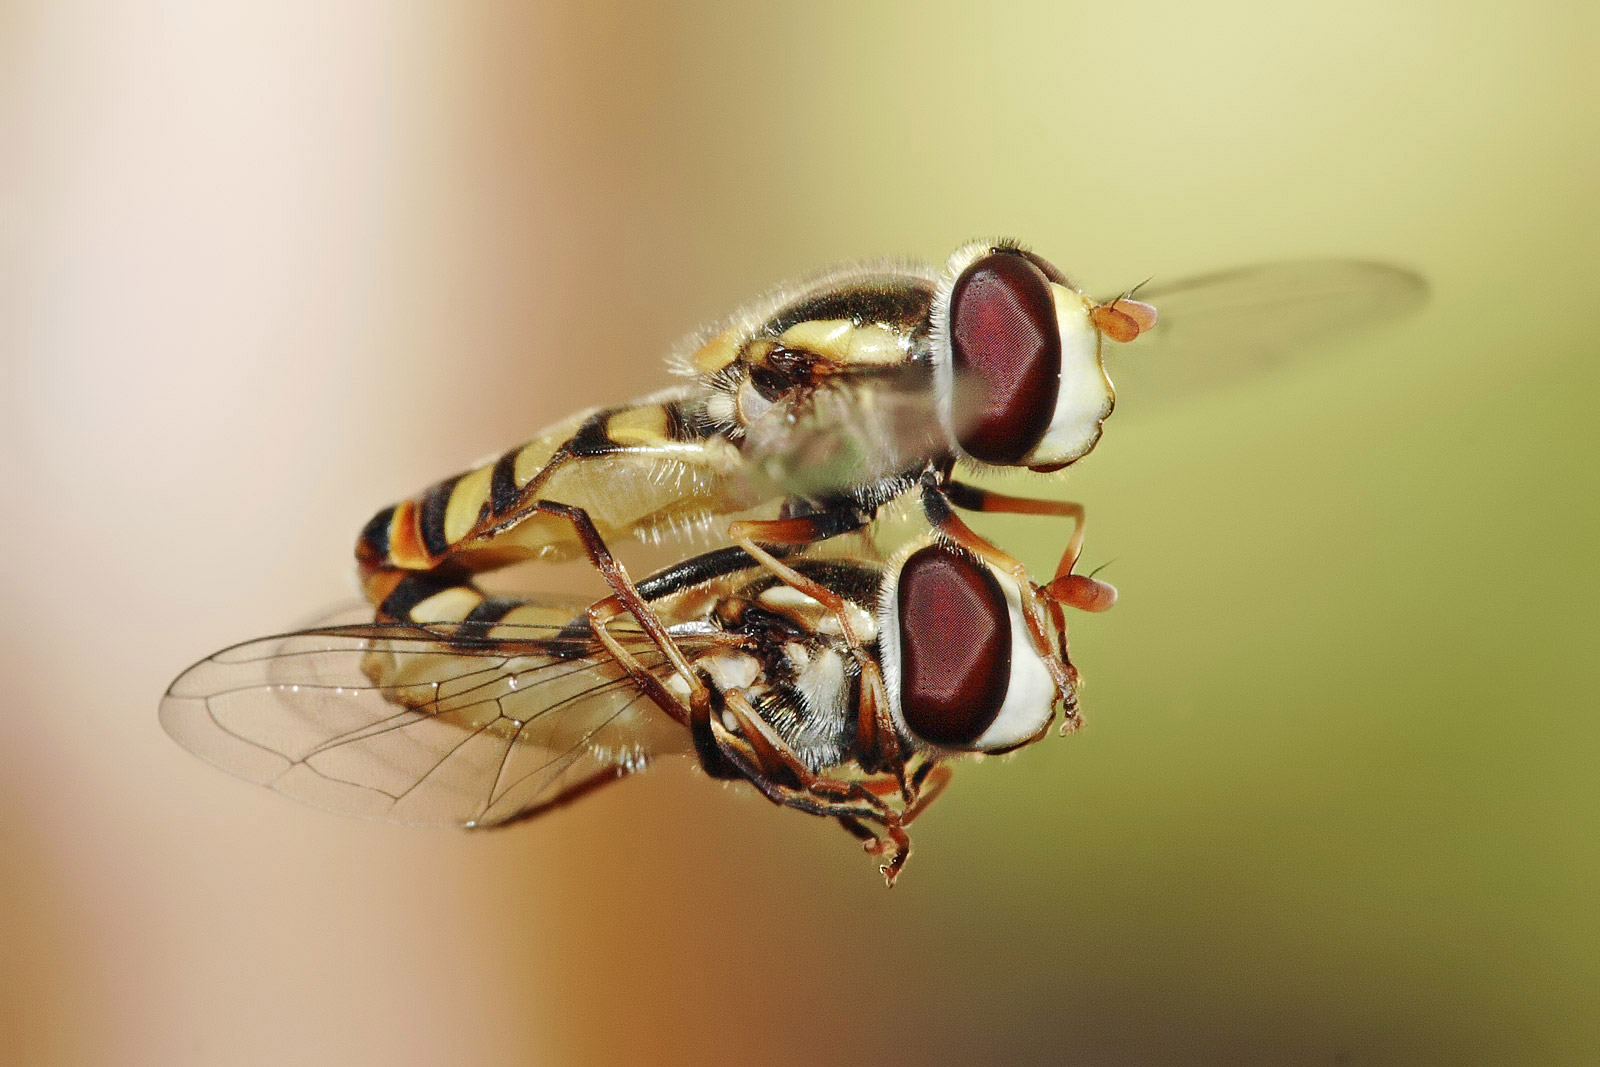

In [28]:
Image(filename='/content/File_Hoverflies mating midair.jpg',width=300,height=200)

In [29]:
preprocessed_image=prepare_image('File_Hoverflies mating midair.jpg')
predictions=mobile.predict(preprocessed_image)
results=imagenet_utils.decode_predictions(predictions)
results

40960/35363 [==================================] - 0s 0us/step


[[('n02268443', 'dragonfly', 0.50068396),
  ('n02190166', 'fly', 0.35925534),
  ('n02264363', 'lacewing', 0.060409248),
  ('n02256656', 'cicada', 0.025047261),
  ('n02206856', 'bee', 0.024255393)]]

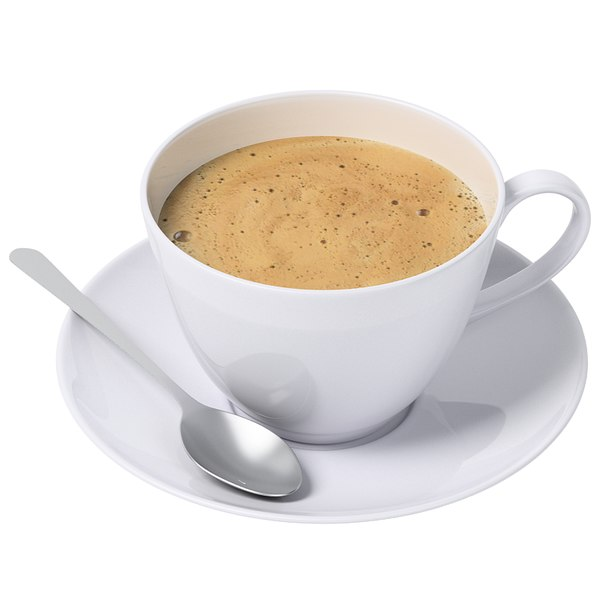

In [33]:
Image(filename='/content/Coffee.jpg',width=300,height=300)

In [34]:
preprocessed_image=prepare_image('Coffee.jpg')
predictions=mobile.predict(preprocessed_image)
results=imagenet_utils.decode_predictions(predictions)
results

[[('n07920052', 'espresso', 0.677344),
  ('n07930864', 'cup', 0.18205622),
  ('n07932039', 'eggnog', 0.06551218),
  ('n03063599', 'coffee_mug', 0.044608206),
  ('n04263257', 'soup_bowl', 0.018519912)]]

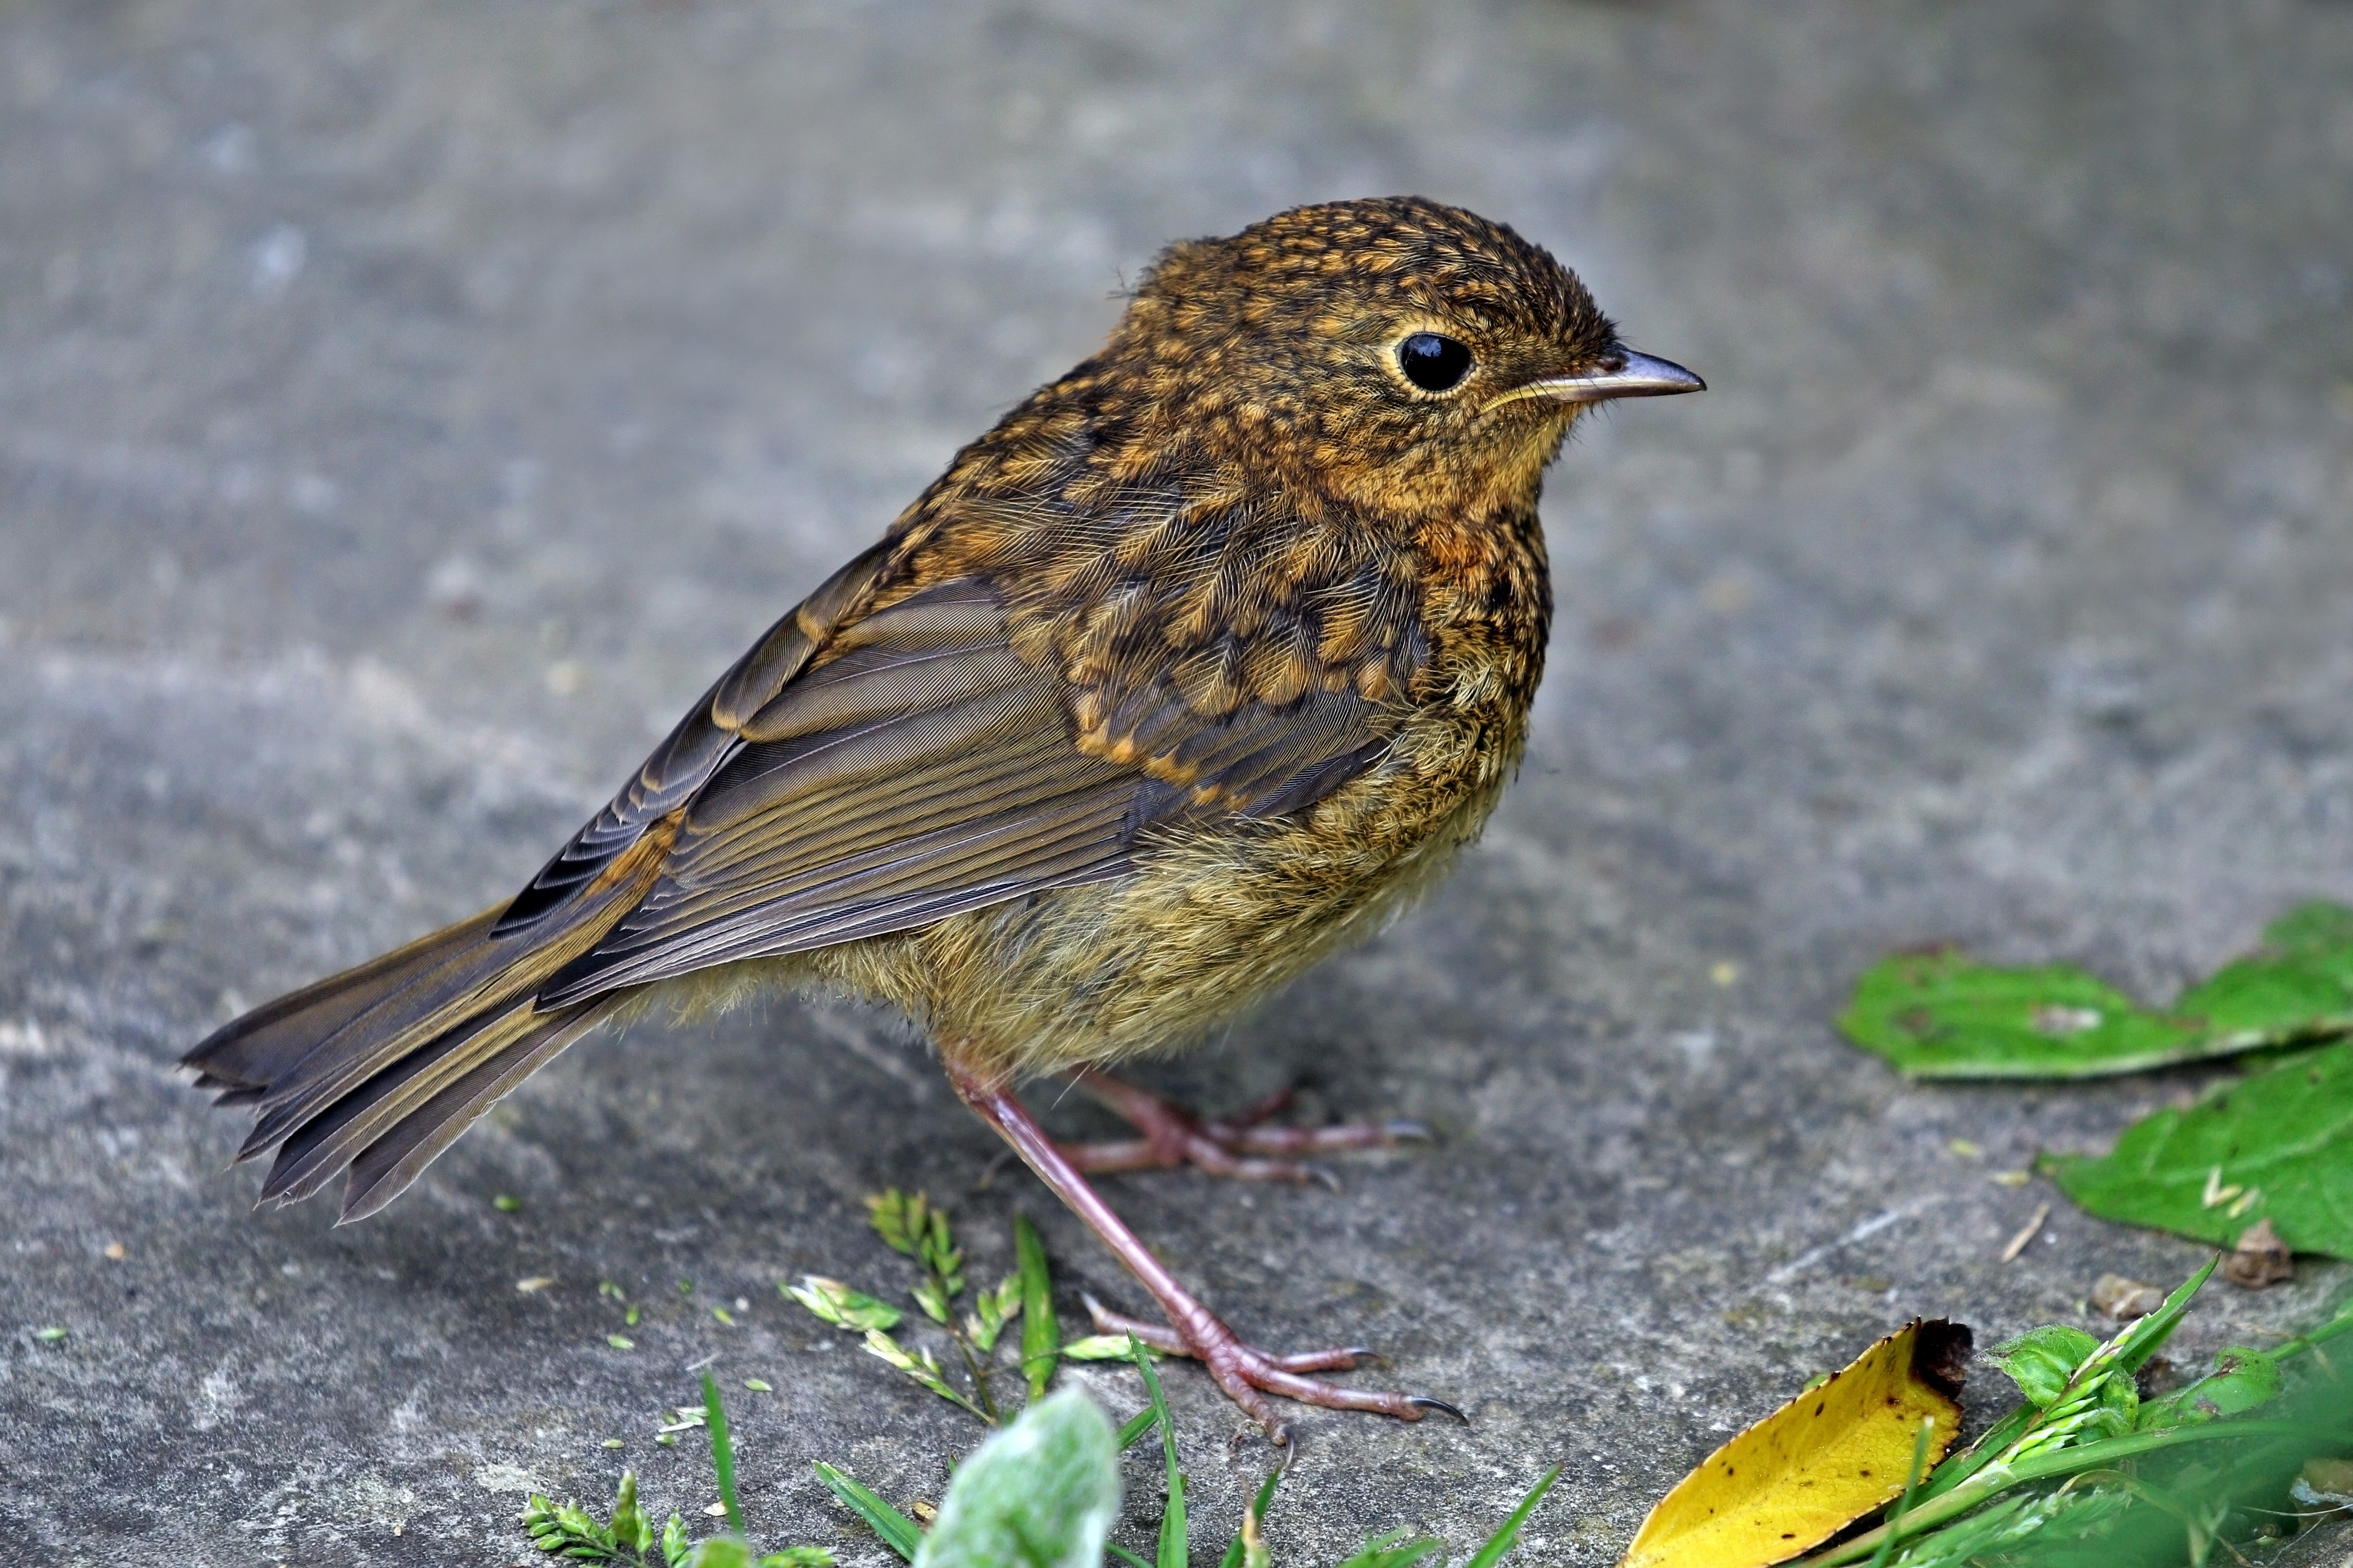

In [37]:
Image(filename='/content/Sparrow.jpg',width=300,height=200)

In [36]:
preprocessed_image=prepare_image('Sparrow.jpg')
predictions=mobile.predict(preprocessed_image)
results=imagenet_utils.decode_predictions(predictions)
results

[[('n01530575', 'brambling', 0.8249095),
  ('n01797886', 'ruffed_grouse', 0.03558961),
  ('n01534433', 'junco', 0.032213245),
  ('n01601694', 'water_ouzel', 0.01816289),
  ('n02025239', 'ruddy_turnstone', 0.016559072)]]